# Analyze Child Mortality

Aim: To analyze child mortality rate to find out the cause of death for children under 5 years.
This notebook describes the steps we followed to create and analyze the dataset. This notebook has analyzed the cause of death of children under 5years from many different countries.


## Table of contents
1. [Initial setup](#data_set)

2. [Load data](#load_data)

3. [Access data](#access_data)

4. [Explore data](#explore_data)

5. [Plot the results](#plot_data)

6. [Download the notebook](#download)

7. [Summary](#summary)


# <a id="initial_setup"></a>
## 1. Initial Setup
Step 1: To create an instance on Bluemix.
1)	Login in to IBM Bluemix, then click on dashboard which opens the catalog.
2)	Select the data and analytics and then click on apache spark.
3)	Add service is been displayed.
4)	Wait for your service to set up by clicking on the create option.

Step 2 : create a notebook using iphython on apache spark
1)	Select the new notebook option 
2)	Then choose the blank option available in the notebook.
3)	Choose python and fill the name (       ).
4)	Click on CREATE NOTEBOOK option present at the bottom.

Step3: upload the data to the notebook
1)	From the site http://www.unicef.org/statistics/index_countrystats.html the data has been downloaded.
2)	The data has been saved as .csv file i.e. child_mortality.csv
3)	Then in the bluemix page select the Data Source option towards the right side.
4)	Click the add source option present and upload the child_mortality.csv file to the notebook.


# <a id="load_data"></a>
## 2. Load data
You can add the CSV file that you downloaded to this notebook by dragging the file to the **Data Source** pane in the notebook **Palette** in the notebook. 
The data file is listed on the **Data Source** pane and is saved in the Object Storage instance associated with your Analytics for Apache Spark service.
The progress bar below the file in the **Data Source** panel indicates the status of the load process. In the next step, you will learn how to access files in Object Storage.

<a id="access_data"></a> 
## 3. Access data 
One the option in python for structured data is pandas. Where series and DataFrame are primary data structure. 
In the following steps, you will load the child_mortality.csv file into a DataFrame in memory.
Where child_mortality.csv file into the dataframe and to run this code, click on Run cell in the toolbar of the notebook.




### Import packages to the notebook

Import the `requests`, `base64`, `StringIO`, `pandas` and `re` packages to use in the notebook. The  pandas package is traditionally imported as `pd`: 

In [524]:
import requests, StringIO, pandas as pd, json, re, numpy as np

###  Access Object Storage

Created an Object Storage, where uploaded the file using Data Sources menu in the Palette.

The child_mortality.csv needs to be accessed from the storage and should be loaded using the function get_file_content():

In [525]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""
    
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

### Insert data source credentials

To insert source credentials to our file child_mortality.csv file. Selected the next code cell and clicked on the insert to code in the notebook present at the data source. Then the file child_mortality.csv is being added to the python dictionary. The file has been uploaded to the dataframe in pandas.


In [526]:
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_cafd18d7_24ad_4619_a6eb_3bf4b5eb4194',
  'project_id':'8734f08b21d54527afe65d5718b4e708',
  'region':'dallas',
  'user_id':'1d8b2d75b3ff4bc5b8dd25060f166602',
  'domain_id':'145b547e796e4e09ad6746cc09ba63ab',
  'domain_name':'1141629',
  'username':'admin_b5713dda62a90b597c9f5519992ce923e02f6d65',
  'password':"""lJ5.Zt]DhQ^pn5y3""",
  'filename':'child_mortality.csv',
  'container':'notebooks',
  'tenantId':'sc64-bd69cb70a56409-6cdf943bba59'
}

### Load data into `pandas DataFrame`

Run the next cell to load the data into a pandas DataFrame: 

In [527]:

content_string = get_file_content(credentials_1)
child_mortality_df = pd.read_csv(content_string)
child_mortality_df=child_mortality_df.replace(np.nan, '',regex=True)

<a id="explore_data"></a> 
## 4. Explore data

Now that your data is in memory, you can begin to explore and manipulate it.
Show the first five and the last five rows of the data by using the head() and tail() methods. Run each code cell:

In [528]:
child_mortality_df.head()

,Countries and areas,Under-5 mortality rank,Under-5 mortality rate in 1990,Under-5 mortality rate in 1990.1,U5MR by sex male 2015,U5MR by sex female 2015,Infant mortality rate in 1990,Infant mortality rate in 2015,Neonatal mortality rate (2015),Annual no. of births (thousands) 2015,Annual no. of under-5 deaths (thousands),GNI per capita (US$),Life expectancy at birth (years),Total adult literacy rate (%),Primary school net enrolment ratio (%)
0,Afghanistan,16,181,91,95,87,123,66,36,1081,94,680,61,32,
1,Albania,112,41,14,15,13,35,13,6,40,1,4450,78,97,96
2,Algeria,79,47,26,27,24,40,22,16,936,24,5490,75,73,99
3,Andorra,182,9,3,3,3,8,2,1,,0,43270,,,
4,Angola,1,226,157,165,149,134,96,49,1128,169,c,53,71,84


In [529]:
child_mortality_df.tail()

,Countries and areas,Under-5 mortality rank,Under-5 mortality rate in 1990,Under-5 mortality rate in 1990.1,U5MR by sex male 2015,U5MR by sex female 2015,Infant mortality rate in 1990,Infant mortality rate in 2015,Neonatal mortality rate (2015),Annual no. of births (thousands) 2015,Annual no. of under-5 deaths (thousands),GNI per capita (US$),Life expectancy at birth (years),Total adult literacy rate (%),Primary school net enrolment ratio (%)
192,Venezuela (Bolivarian Republic of),110,30,15,17,13,25,13,9,599,9,12500,74,95,93
193,Viet Nam,84,51,22,25,19,37,17,11,1582,34,1890,76,94,98
194,Yemen,56,126,42,46,38,89,34,22,856,34,1300,64,68,85
195,Zambia,33,191,64,69,59,113,43,21,645,39,1680,61,61,89
196,Zimbabwe,26,76,71,76,65,51,47,24,539,38,840,59,84,89


Each row in the table lists:
The country or the region where the measurements were taken.
The Under-5 Mortality Rate rank,Under-5 Mortality Rate in 1990 ,U5M R by sex in 2015,Infant Mortality Rate ,Neonatal mortality rate,Annual no of births,GNI per capita,Life Expectancy,Total Adult Literacy Rate ,Primary school net enrollment ratio.

By using the DataFrame API, you can list all countries or areas for which mortality exist. Run the following cell to list these countries:

In [530]:
child_mortality_df.ix[:,0:1]

,Countries and areas
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
5,Antigua and Barbuda
6,Argentina
7,Armenia
8,Australia
9,Austria


Having the names of the countries or areas as a column comes in handy, but it would be more useful to have the names as an index to the rows. To manipulate the `DataFrame` in this way, run the next cell:

In [531]:
child_mortality_df = child_mortality_df.set_index(child_mortality_df['Countries and areas'])
child_mortality_df.drop(['Countries and areas'], axis=1, inplace=True)
child_mortality_df.head()

,Under-5 mortality rank,Under-5 mortality rate in 1990,Under-5 mortality rate in 1990.1,U5MR by sex male 2015,U5MR by sex female 2015,Infant mortality rate in 1990,Infant mortality rate in 2015,Neonatal mortality rate (2015),Annual no. of births (thousands) 2015,Annual no. of under-5 deaths (thousands),GNI per capita (US$),Life expectancy at birth (years),Total adult literacy rate (%),Primary school net enrolment ratio (%)
Countries and areas,,,,,,,,,,,,,,
Afghanistan,16,181,91,95,87,123,66,36,1081,94,680,61,32,
Albania,112,41,14,15,13,35,13,6,40,1,4450,78,97,96
Algeria,79,47,26,27,24,40,22,16,936,24,5490,75,73,99
Andorra,182,9,3,3,3,8,2,1,,0,43270,,,
Angola,1,226,157,165,149,134,96,49,1128,169,c,53,71,84


<a id="plot_data"></a> 
## 5. Plot the results

When you work in notebooks, you can decide how to present your anlysis results and derived information. So far, we have used normal print functions, which are informative. However, we can also show the results in a visual way by using the popular matplotlib package to create plots.

First, render your results as inline charts:
Input: %matplotlib inline 
Now we used pandas wrappers around the matplotlib routines. Because we changed the index of the table rows, we can access the mortality rates of a country or area by name. For example, we ran the following cell to plot the annual mortality of India

In [532]:
%matplotlib inline 

Now use pandas wrappers around the matplotlib routines. Because you changed the index of the table rows, you can access the mortality rates of a country or area by name. For example, run the following cell to plot the male child mortality of India

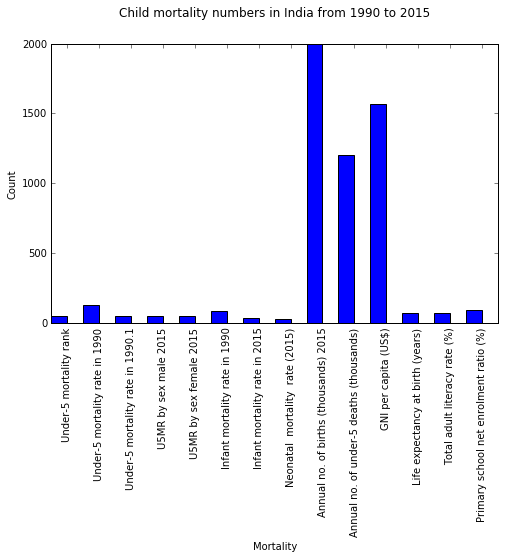

In [533]:


import matplotlib.pyplot as plt

india = child_mortality_df.ix['India'];
mortality = india.astype(np.float64).index
index = np.arange(len(mortality))  
plt.figure(figsize=(8,5))
bar_width = 0.5
plt.bar(index, india, bar_width, color='b')
plt.xlabel("Mortality")
plt.ylabel("Count")
plt.title("Child mortality numbers in %s from 1990 to 2015" % india.name, y=1.08)
plt.xticks(index + bar_width, mortality, rotation=90)
plt.ylim( 1, 2000 ) 
plt.show()

### Plot the countries or areas with the highest mortality rate

To get a list of the countries with the highest mortality rate , you have to compute the sum of all the mortality rates. You can do this by using the pandas sum() method. This method adds an additional column called SUM, which contains the sums of the mortality rates to the child_mortality_df DataFrame.

Next, sort the DataFrame by all the  mortality rates depending on the gender and print :

In [534]:

child_mortality_sorted_df = child_mortality_df.sort_values(['U5MR by sex male 2015'],ascending=False);
top5_sums = pd.Series(child_mortality_sorted_df["U5MR by sex male 2015"].head(5))
top5_sums


Countries and areas
Guinea         99
South Sudan    98
Lesotho        97
Mauritania     96
Afghanistan    95
Name: U5MR by sex male 2015, dtype: object

Plotted the top five countries next to each another in a line graph for a better comparison of the recordings.

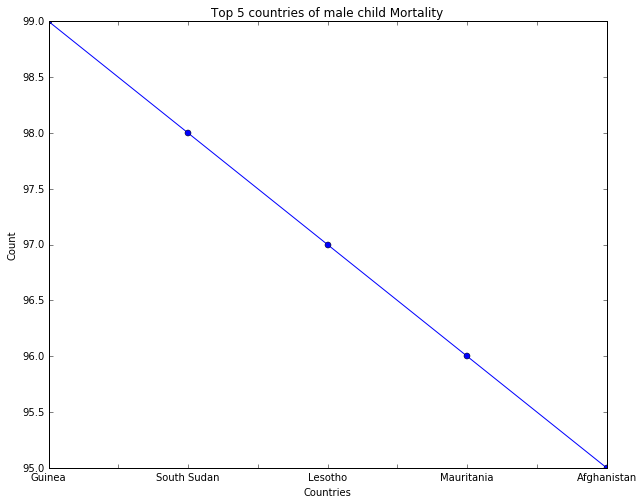

In [535]:
top5_bars = top5_sums.astype(np.float64)[0:5].transpose()
ax = top5_bars.plot(figsize=(10,8), marker='o', linestyle='-', title="Top 5 countries of male child Mortality")
ax.set_xlabel("Countries")
ax.set_ylabel("Count");

Finally, compared the male child mortality for the top five countries. Guinea has the highest death, followed by South Sudan. The line graph also shows that some values are missing, which makes comparing measurements difficult. 

To show the total mortality for the top five countries in relation to the total mortality for all countries over the entire time period, we used a pie chart. Run the next code cell to create a pie chart by using the `matplotlib` library:

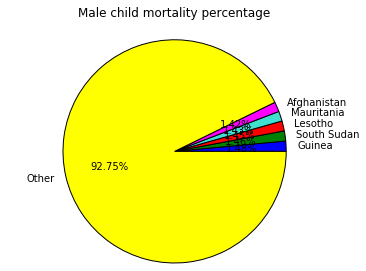

In [536]:
mortality_sums = top5_sums
d=child_mortality_sorted_df.applymap(lambda x: 0 if isinstance(x, basestring) and x.isspace() else x)
pd.to_numeric(d["U5MR by sex male 2015"]);


other_sums = d["U5MR by sex male 2015"].astype(np.float64)[5:].sum()

mortality_sums["Other"] = other_sums
plt.axis('equal')
plt.title("Male child mortality percentage",y=1.08)
plt.pie(
    mortality_sums,
    labels=mortality_sums.index,
    colors=['blue', 'green', 'red', 'turquoise', 'magenta','yellow'],
    autopct="%1.2f%%",
    radius=1.25);



A line of best fit is a straight line that is the best approximation of the given set of data.
The `polyfit()` function fits a line through data points. Because the DataFrame you are using is two-dimentional, it returns two values, the slope and the intercept. To determine whether the trend is positive or negative, you need only the slope. And naturally, you have to exclude any data points that correpond to the value 0.0. 

Run the next cells to determine and line plot the trend for Chile:

<a id="download"></a>
## 6. Download the notebook

We downloaded the notebook and shared it in github.